In [13]:
from src import *
import networkx as nx
import matplotlib.pyplot as plt
import xgi
import os, warnings

warnings.simplefilter("ignore")

In [4]:
G = nx.karate_club_graph()

A = nx.adjacency_matrix(G, weight=None)
n = np.size(A, axis=0)

In [22]:
s0 = np.zeros(n)
p_s = 0.2
s0[list(random.sample(range(n), int(p_s * n)))] = 1

gamma = 1
tau = 2
b = 0.1

contagion_function = lambda nu, b: 1 - (1 - b) ** nu
c = contagion_function(np.arange(n), b)

# contagion_function = lambda nu, tau, b: (nu >= tau) * b
# c = contagion_function(np.arange(n), tau, beta)

x = contagion_process(A, gamma, c, s0, tmin=0, tmax=100, random_seed=None)

deg = np.linspace(10, 20, 10)
epsilon = np.linspace(0, 1, 10)
realizations = 10

p_c = np.ones((2, n))

l = np.zeros((10, 10, realizations))
for i, d in enumerate(deg):
    for j, e in enumerate(epsilon):
        for k in range(realizations):
            A = xgi.adjacency_matrix(xgi.uniform_HPPM(n, 2, k, e))
            nl, ml = count_all_infection_events(x, A)
            l[i, j, k] = dynamics_log_likelihood(nl, ml, p_c)

        print(i, k)

0 9
0 9
0 9
0 9
0 9
0 9
0 9
0 9
0 9
0 9
1 9
1 9
1 9
1 9
1 9
1 9
1 9
1 9
1 9
1 9
2 9
2 9
2 9
2 9
2 9
2 9
2 9
2 9
2 9
2 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
4 9
4 9
4 9
4 9
4 9
4 9
4 9
4 9
4 9
4 9
5 9
5 9
5 9
5 9
5 9
5 9
5 9
5 9
5 9
5 9
6 9
6 9
6 9
6 9
6 9
6 9
6 9
6 9
6 9
6 9
7 9
7 9
7 9
7 9
7 9
7 9
7 9
7 9
7 9
7 9
8 9
8 9
8 9
8 9
8 9
8 9
8 9
8 9
8 9
8 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9


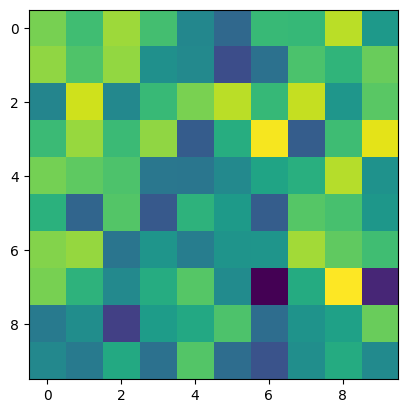

In [23]:
plt.figure()
plt.imshow(to_imshow_orientation(np.mean(l, axis=2)))